In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
from stable_diffusion_tf.diffusion_model import (
    BkTinyLCMSplitUNetModel,
    BkTinyLCMUNetModel,
    BkTinyLCMUNetModelAll,
)
custom_objects={'BkTinyLCMUNetModelAll':BkTinyLCMUNetModelAll}
path_to_model = "/home/kris/pengzhiyu/bk-sdm-tf/tflite_deploy/bk-sdm-tflite-inference/output_dir/converted_h5/m138/diffusion_model.hdf5"
diffusion = tf.keras.models.load_model(path_to_model,custom_objects = custom_objects)

2024-07-23 21:21:47.968211: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 21:21:47.968240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 21:21:47.969431: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 21:21:47.976252: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 21:21:48.785024: W tensorflow/comp

2 Physical GPUs, 2 Logical GPUs


2024-07-23 21:21:49.717524: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22410 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:65:00.0, compute capability: 8.6
2024-07-23 21:21:49.718152: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 20390 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:b3:00.0, compute capability: 8.6
/home/kris/pengzhiyu/bk-sdm-tf/.venv/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see:

In [2]:
# 打印模型概要
diffusion.summary()

# 获取模型配置
config = diffusion.get_config()

# 获取模型层
layers = diffusion.layers


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 4)]          0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 320)]                0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 77, 768)]            0         []                            
                                                                                                  
 bk_tiny_lcmu_net_model_all  (None, 32, 32, 4)            3234668   ['input_2[0][0]',             
  (BkTinyLCMUNetModelAll)                                 84         'input_1[0][0]',         

In [ ]:
# 获取部分层
partial_diffusion = tf.keras.diffusions.diffusion(inputs=diffusion.input, 
                                   outputs=diffusion.get_layer('layer_name').output)

# 或者使用函数式API创建子模型
input_tensor = tf.keras.layers.Input(shape=[1, 32, 32, 4])
x = diffusion.layers[1](input_tensor)
x = diffusion.layers[2](x)
output = diffusion.layers[3](x)
sub_diffusion = tf.keras.diffusions.diffusion(inputs=input_tensor, outputs=output)


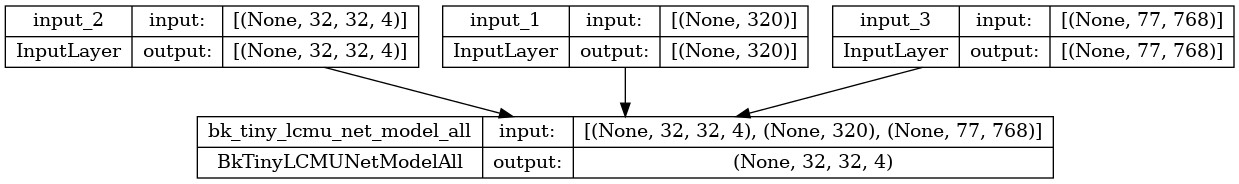

In [3]:
from keras.utils import plot_model

plot_model(diffusion, to_file='model.png', show_shapes=True)


In [3]:
layers